In [171]:
import env
import acquire
import prepare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
items_df = pd.read_csv("items.csv")
stores_df = pd.read_csv("stores.csv")
sales_df = pd.read_csv("sales.csv")

In [4]:
zach_df = acquire.merge_zach_dataframes(items_df, stores_df, sales_df)

In [5]:
zach_df = prepare.prepare_zach_df(zach_df)

In [8]:
zach_df.shape

(913000, 16)

In [9]:
zach_df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,218.40
2013-01-01,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,125.55
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,1,1,453.60
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,1,1,294.00


In [16]:
daily_total_sales = zach_df.groupby('sale_date').sales_total.sum()

# Splitting the data

## Visual the target to decide how to split

In [24]:
daily_total_sales = pd.DataFrame(daily_total_sales)

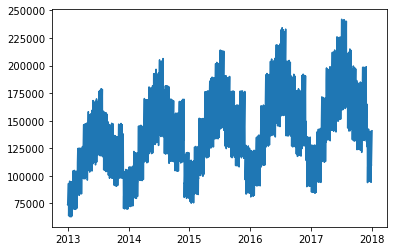

In [29]:
plt.plot(daily_total_sales.index, daily_total_sales.sales_total)

### Percentage-based

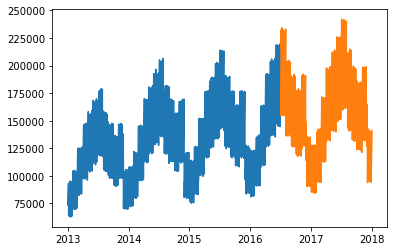

In [30]:
# 70/30 train/test split
train_size = .70
n = daily_total_sales.shape[0]
test_start_index = round(train_size * n)

train = daily_total_sales[:test_start_index]
test = daily_total_sales[test_start_index:]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

### Human-based

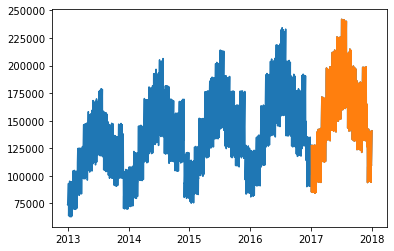

In [32]:
# Save 2017-2018 for test
train = daily_total_sales[:'2017']
test = daily_total_sales['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

## Visualizations

In [33]:
y = train.sales_total
y.head()

sale_date
2013-01-01    73844.01
2013-01-02    73570.58
2013-01-03    78169.48
2013-01-04    84467.73
2013-01-05    87621.85
Name: sales_total, dtype: float64

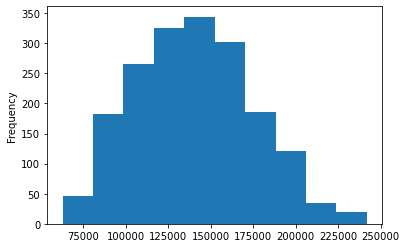

In [36]:
y.plot.hist()
plt.show()

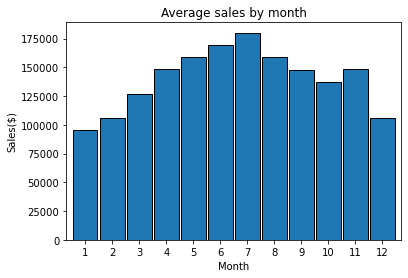

In [38]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales by month', xlabel='Month', ylabel='Sales($)')
plt.show()

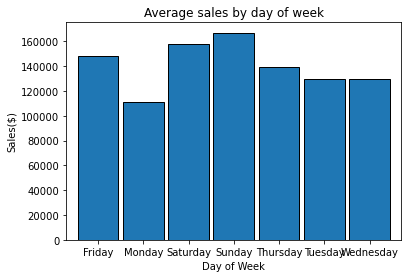

In [40]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales by day of week', xlabel='Day of Week', ylabel='Sales($)')
plt.show()

## Visualize the target over time

<AxesSubplot:xlabel='sale_date'>

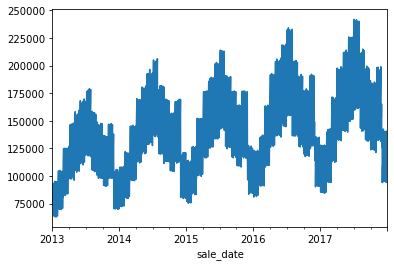

In [47]:
y.plot()

<AxesSubplot:title={'center':'Weekly average'}, xlabel='sale_date'>

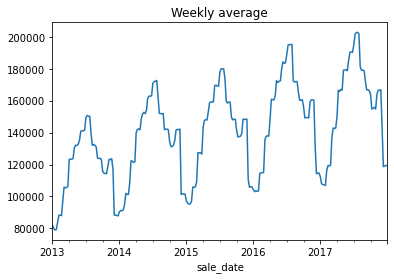

In [50]:
y.resample('W').mean().plot(title="Weekly average")

<AxesSubplot:title={'center':'Monthly average'}, xlabel='sale_date'>

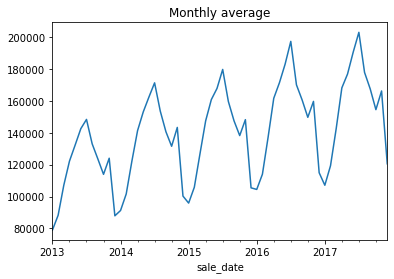

In [49]:
y.resample('M').mean().plot(title="Monthly average")

<AxesSubplot:title={'center':'Quarterly average'}, xlabel='sale_date'>

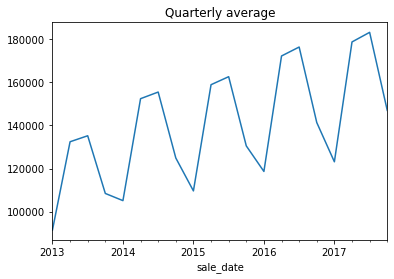

In [51]:
y.resample('Q').mean().plot(title="Quarterly average")

<AxesSubplot:title={'center':'Yearly average'}, xlabel='sale_date'>

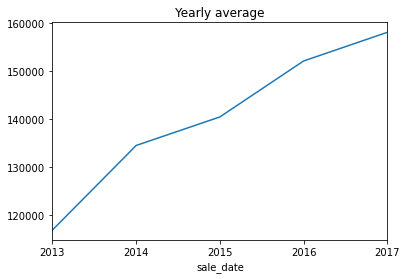

In [52]:
y.resample('A').mean().plot(title="Yearly average")

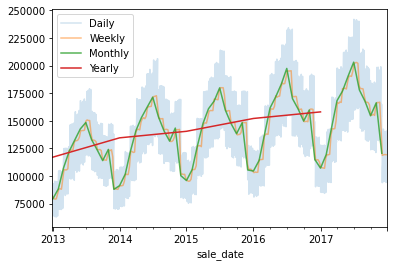

In [54]:
y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.5, label='Weekly')
y.resample('M').mean().plot(alpha=.8, label='Monthly')
y.resample('A').mean().plot(label='Yearly')
plt.legend()

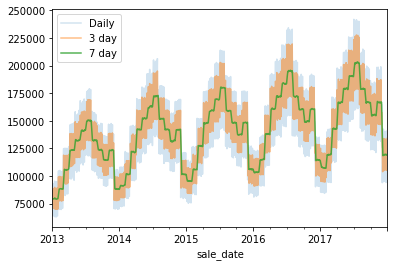

In [56]:
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='7 day')
plt.legend()

## Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in sales dollars'}, xlabel='sale_date'>

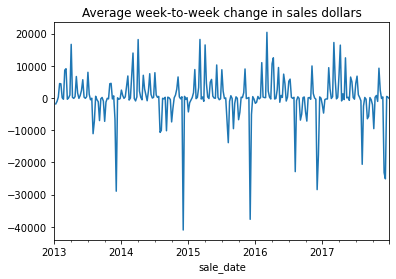

In [57]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales dollars')

<AxesSubplot:title={'center':'Average month-to-month change in sales dollars'}, xlabel='sale_date'>

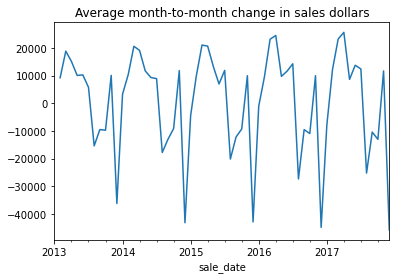

In [58]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales dollars')

## Seasonal plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

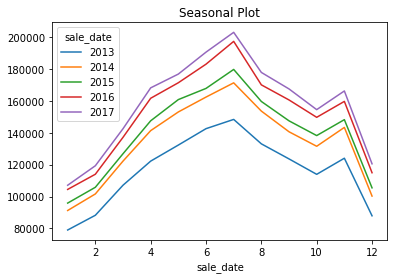

In [63]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

## Seasonal Subseries Plot

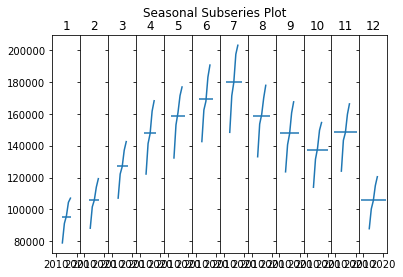

In [64]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

## Lag plot

Text(0.5, 1.0, 'Lag plot with lag=1')

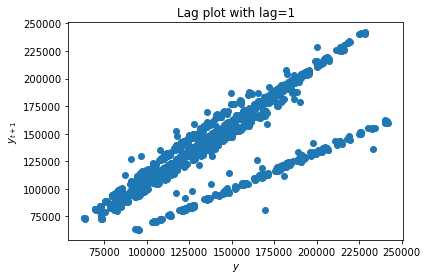

In [65]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

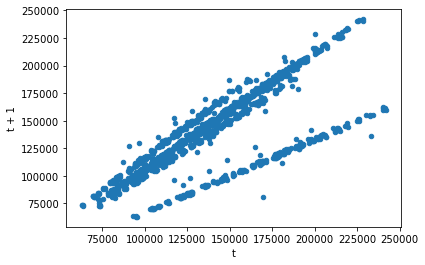

In [68]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [69]:
del train['y(t + 1)']

In [70]:
train.columns

Index(['sales_total'], dtype='object')

,this_week,the_next_week
sale_date,,
2013-01-06,81794.583333,79990.601429
2013-01-13,79990.601429,78973.360000
2013-01-20,78973.360000,79272.691429
2013-01-27,79272.691429,83792.507143
2013-02-03,83792.507143,88227.801429
...,...,...
2017-12-03,143735.021429,118656.734286
2017-12-10,118656.734286,119181.612857
2017-12-17,119181.612857,119434.030000


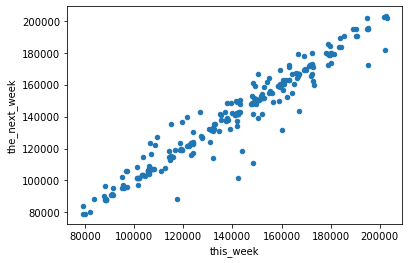

In [71]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,12_weeks_out
sale_date,,
2013-01-06,81794.583333,106501.331429
2013-01-13,79990.601429,123193.640000
2013-01-20,78973.360000,123430.685714
2013-01-27,79272.691429,123345.042857
2013-02-03,83792.507143,123791.114286
...,...,...
2017-12-03,143735.021429,NaN
2017-12-10,118656.734286,NaN
2017-12-17,119181.612857,NaN


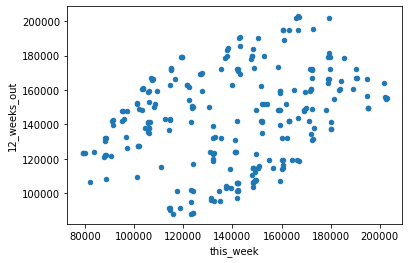

In [72]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,half_a_year_later
sale_date,,
2013-01-06,81794.583333,149604.697143
2013-01-13,79990.601429,150789.424286
2013-01-20,78973.360000,150282.567143
2013-01-27,79272.691429,150242.265714
2013-02-03,83792.507143,139188.128571
...,...,...
2017-12-03,143735.021429,NaN
2017-12-10,118656.734286,NaN
2017-12-17,119181.612857,NaN


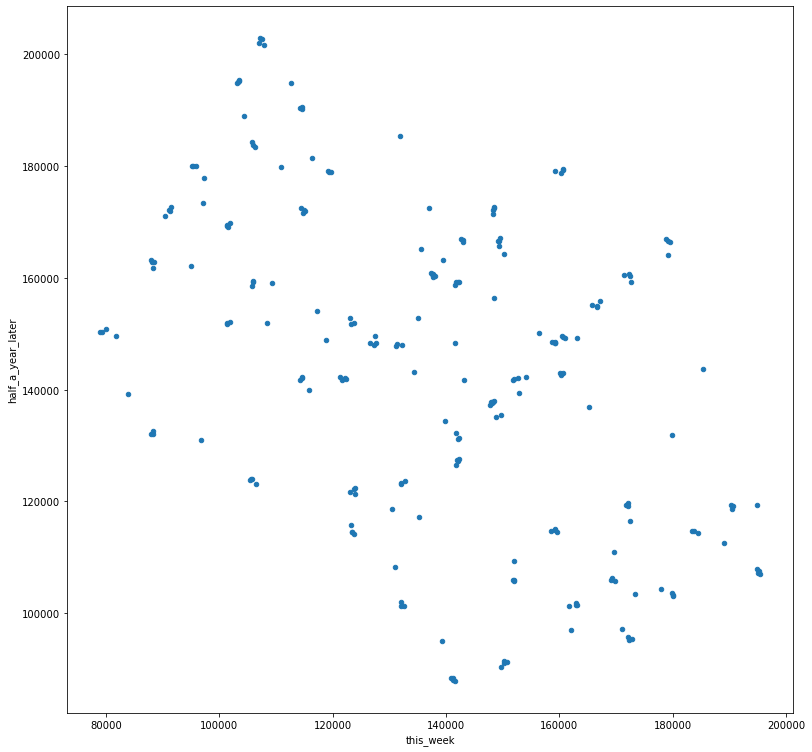

In [75]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

,this_week,year_later
sale_date,,
2013-01-06,81794.583333,90373.531429
2013-01-13,79990.601429,91200.402857
2013-01-20,78973.360000,91116.268571
2013-01-27,79272.691429,91510.905714
2013-02-03,83792.507143,95024.768571
...,...,...
2017-12-03,143735.021429,NaN
2017-12-10,118656.734286,NaN
2017-12-17,119181.612857,NaN


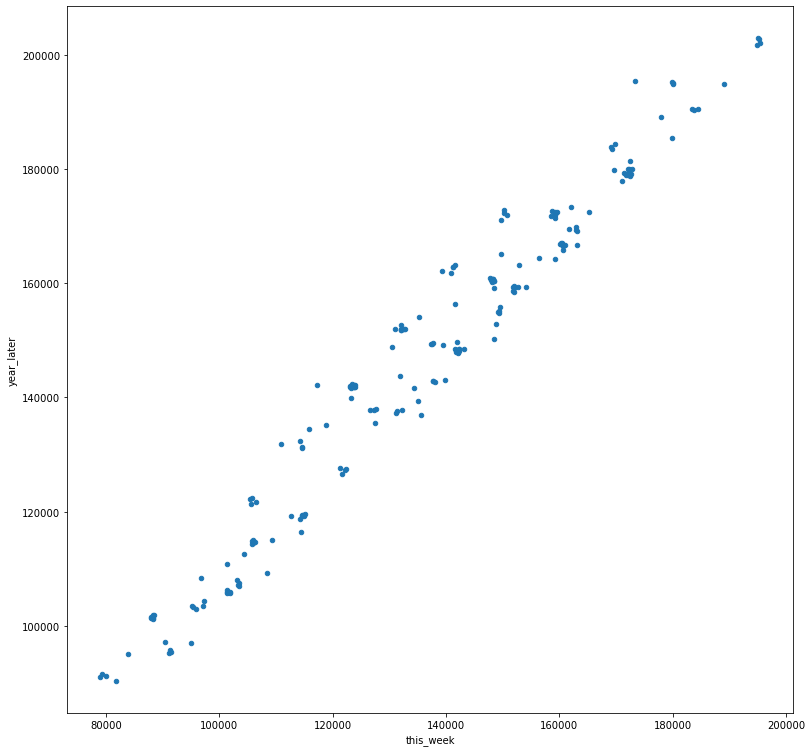

In [77]:
weekly = train.resample('W').mean()
weekly['year_later'] = weekly.sales_total.shift(-52)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='year_later', figsize=(13, 13))
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

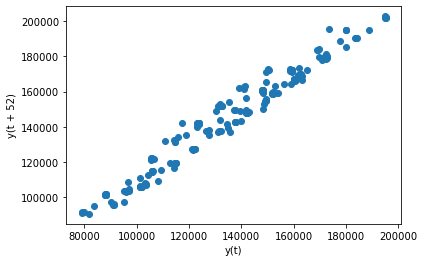

In [79]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)

### Autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

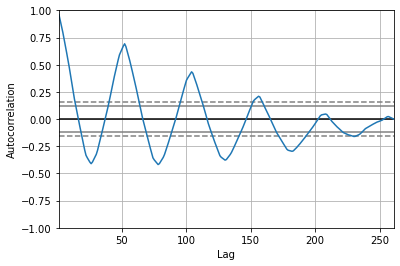

In [81]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [82]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,81794.583333,NaN,-39546.987151,NaN
2013-01-13,79990.601429,NaN,-41411.171921,NaN
2013-01-20,78973.360000,NaN,-41813.217384,NaN
2013-01-27,79272.691429,NaN,-42047.601887,NaN
2013-02-03,83792.507143,NaN,-41060.050472,NaN


<AxesSubplot:xlabel='sale_date'>

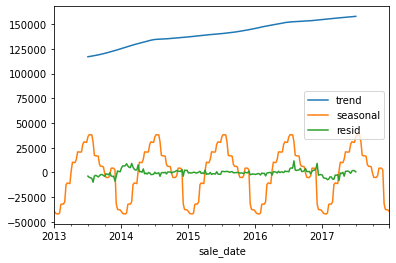

In [83]:
decomposition.iloc[:, 1:].plot()

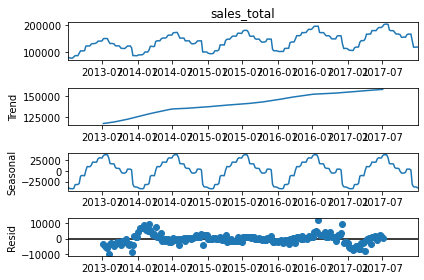

In [84]:
result.plot()
None

## Categories over time 

In [86]:
train['sales_bin'] = pd.qcut(train.sales_total, 4, labels=["quartile_1", "quartile_2", "quartile_3", "quartile_4"])
train.groupby('sales_bin').mean()

,sales_total
sales_bin,
quartile_1,97332.398950
quartile_2,127136.302851
quartile_3,151482.712500
quartile_4,185841.329912


Text(0, 0.5, '% of days in the month')

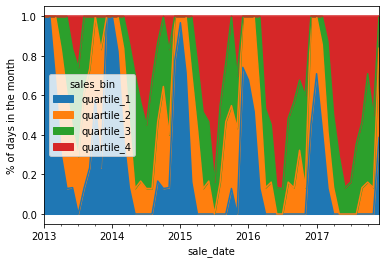

In [89]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

## strftime

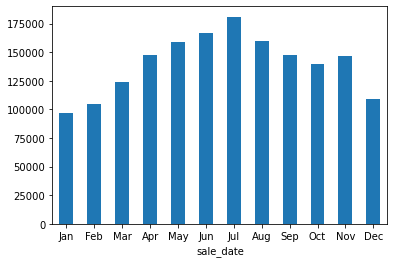

In [91]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

### Matplotlib Dates 

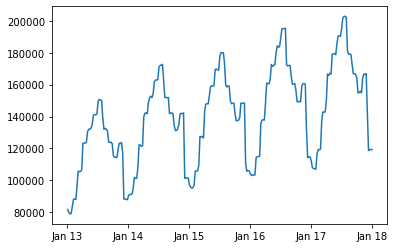

In [92]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

# Germany Data

In [94]:
germany_df = prepare.prepare_germany_df(acquire.acquire_germany())

In [96]:
germany_df.sample(14)

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2008-04-30,1374.498,0.000,0.000,0.000,4,2008
2017-02-23,1561.235,705.403,50.721,756.124,2,2017
2014-08-18,1347.832,351.145,110.877,462.022,8,2014
2014-08-23,1145.574,87.425,106.408,193.833,8,2014
2011-09-30,1368.823,25.690,0.000,0.000,9,2011
2013-01-12,1192.418,33.461,20.777,54.238,1,2013
2013-03-22,1383.170,208.389,105.826,314.215,3,2013
2016-10-25,1499.188,42.555,24.537,67.092,10,2016
2007-03-23,1517.529,0.000,0.000,0.000,3,2007


In [97]:
germany_df['net_consumption'] = germany_df.consumption - germany_df.wind_and_solar
germany_df.sample(14)

,consumption,wind,solar,wind_and_solar,month,year,net_consumption
date,,,,,,,
2012-06-24,966.313,194.586,118.912,313.498,6,2012,652.815
2007-04-05,1438.047,0.000,0.000,0.000,4,2007,1438.047
2016-04-01,1451.858,96.550,105.434,201.984,4,2016,1249.874
2012-03-01,1411.553,62.293,40.042,102.335,3,2012,1309.218
2008-01-05,1355.843,0.000,0.000,0.000,1,2008,1355.843
2015-07-01,1444.957,158.819,217.827,376.646,7,2015,1068.311
2011-10-20,1465.479,114.123,0.000,0.000,10,2011,1465.479
2014-01-28,1636.751,157.588,38.964,196.552,1,2014,1440.199
2014-08-12,1346.617,197.775,142.509,340.284,8,2014,1006.333


## Splitting the data

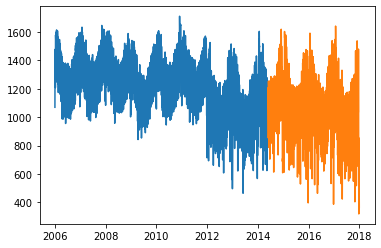

In [101]:
#Percentage
train_size = .70
n = germany_df.shape[0]
test_start_index = round(train_size * n)

train = germany_df[:test_start_index] # everything up (not including) to the test_start_index
test = germany_df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.net_consumption)
plt.plot(test.index, test.net_consumption)

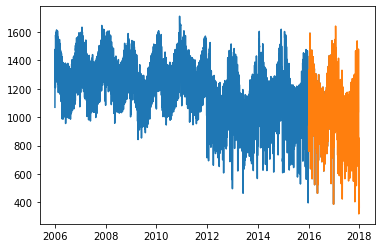

In [100]:
# Human decision
train = germany_df[:'2016'] # everything up (not including) to the test_start_index
test = germany_df['2016':] # everything from the test_start_index to the end

plt.plot(train.index, train.net_consumption)
plt.plot(test.index, test.net_consumption)

## Visualizations

In [103]:
y = train.net_consumption
y.head()

date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: net_consumption, dtype: float64

<AxesSubplot:ylabel='Frequency'>

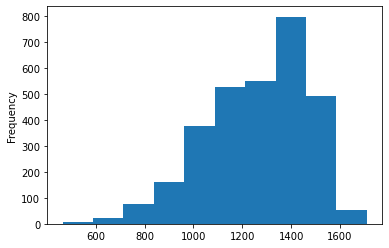

In [104]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Net Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Net Energy Consumption')]

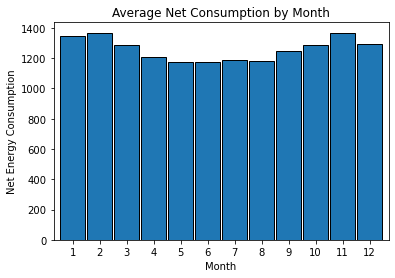

In [105]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Net Consumption by Month', xlabel='Month', ylabel='Net Energy Consumption')

Dip in the summer months probably due to the incrased solar energy production

[Text(0.5, 1.0, 'Average Net Consumption by Year'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Net Energy Consumption')]

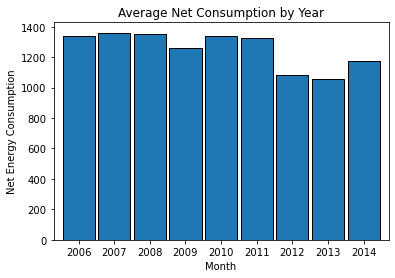

In [117]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Net Consumption by Year', xlabel='Month', ylabel='Net Energy Consumption')

[Text(0.5, 1.0, 'Average Net Consumption by Day of Week'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Net Energy Consumption')]

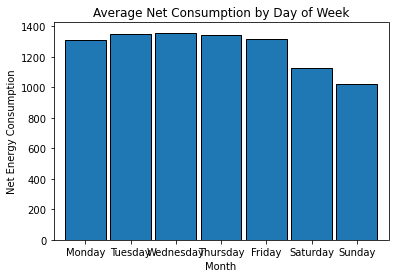

In [118]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Net Consumption by Day of Week', xlabel='Month', ylabel='Net Energy Consumption')

On average, there is less energy consumption on the weekends.

<AxesSubplot:xlabel='weekday', ylabel='net_consumption'>

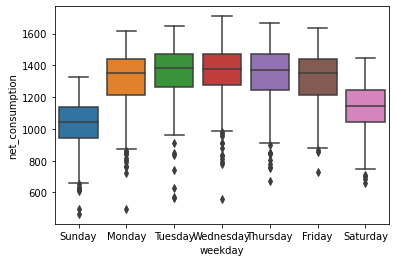

In [115]:
(
    y.reset_index()
    .assign(weekday=y.index.day_name())
    .pipe((sns.boxplot, 'data'), y='net_consumption', x='weekday')
)

## Visualize target over time

<AxesSubplot:xlabel='date'>

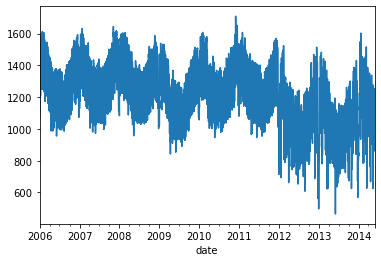

In [119]:
y.plot()

<AxesSubplot:title={'center':'Monthly average net consumption'}, xlabel='date'>

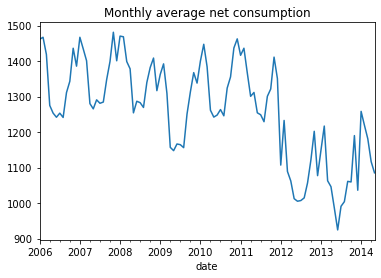

In [123]:
y.resample('M').mean().plot(title="Monthly average net consumption")

<AxesSubplot:title={'center':'Quarterly Average of Net Consumption'}, xlabel='date'>

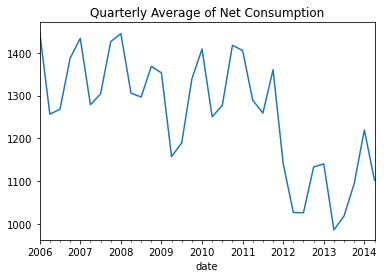

In [120]:
y.resample('Q').mean().plot(title="Quarterly Average of Net Consumption")

<AxesSubplot:title={'center':'Annual mean net consumption'}, xlabel='date'>

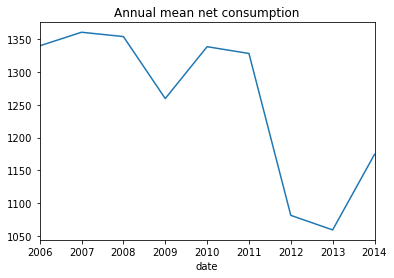

In [122]:
y.resample('A').mean().plot(title="Annual mean net consumption")

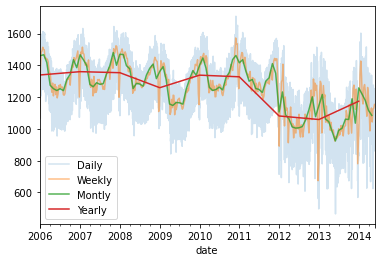

In [124]:
y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.5, label='Weekly')
y.resample('M').mean().plot(alpha=.8, label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

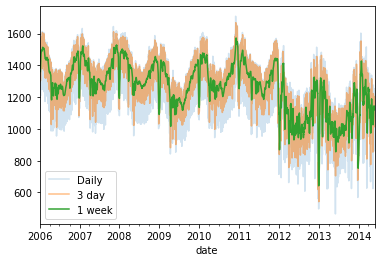

In [125]:
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

In [163]:
zach_df.rename(columns={'sale_amount' : 'items_sold'}, inplace=True)
zach_df.columns

Index(['item_brand', 'item_id', 'item_name', 'item_price', 'item_upc12',
       'item_upc14', 'items_sold', 'sale_id', 'store_id', 'store_address',
       'store_city', 'store_state', 'store_zipcode', 'month', 'day_of_week',
       'sales_total'],
      dtype='object')

## Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in net consumption'}, xlabel='date'>

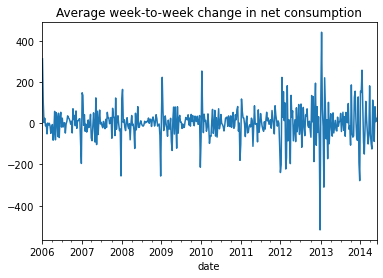

In [126]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in net consumption')

More variability after 2012

<AxesSubplot:title={'center':'Average month-to-month change in net consumption'}, xlabel='date'>

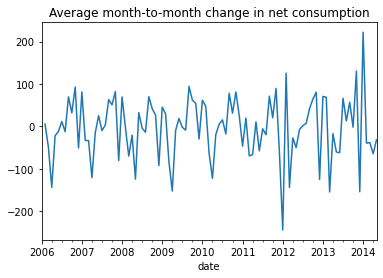

In [128]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in net consumption')

<AxesSubplot:title={'center':'Average quarterly change in net consumption'}, xlabel='date'>

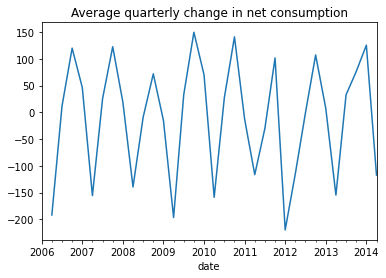

In [130]:
y.resample('Q').mean().diff().plot(title='Average quarterly change in net consumption')

<AxesSubplot:title={'center':'Average year-to-year change in net consumption'}, xlabel='date'>

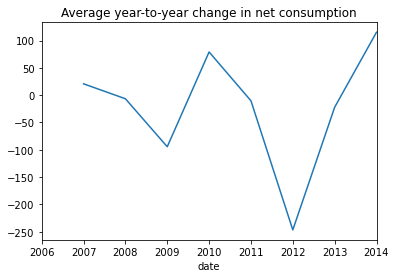

In [129]:
y.resample('A').mean().diff().plot(title='Average year-to-year change in net consumption')

## Seasonal plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

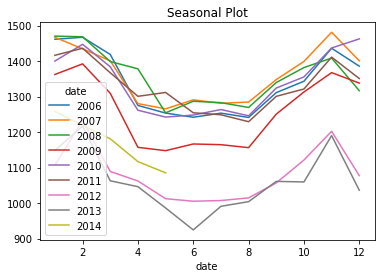

In [131]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

Large decrease in net consumption in 2012 and after that 

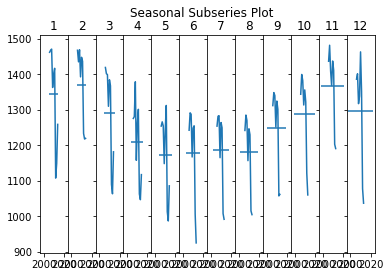

In [134]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Downward trend for each month over the years

## Lag plot

Text(0.5, 1.0, 'Lag plot with lag=1')

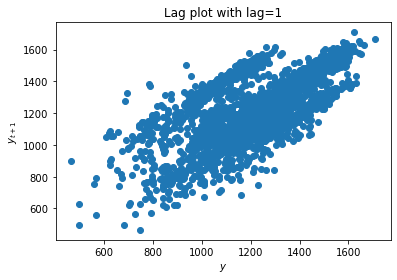

In [135]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

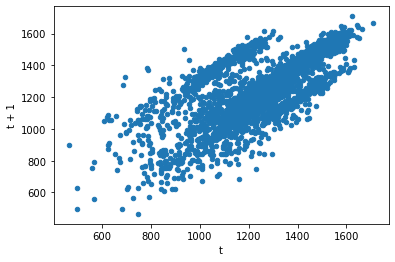

In [137]:
train['y(t + 1)'] = train.net_consumption.shift(-1)
ax = train.plot.scatter(x='net_consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [138]:
del train['y(t + 1)']

,consumption,wind,solar,wind_and_solar,month,year,this_week,the_next_week
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,1069.184000,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,1381.300143,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,1486.730286,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,1490.031143,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,1514.176857,1501.403286
...,...,...,...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,4.571429,2014.0,1131.674143,1043.468714
2014-05-11,1372.166000,204.100143,124.597143,328.697286,5.000000,2014.0,1043.468714,1123.655857
2014-05-18,1372.636143,117.518286,131.462000,248.980286,5.000000,2014.0,1123.655857,1130.985857


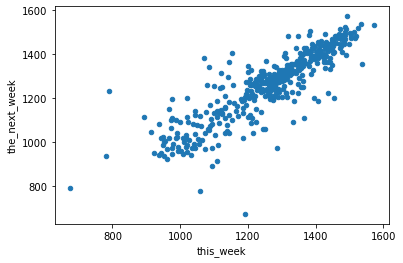

In [139]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.net_consumption.shift(-1)
weekly = weekly.rename(columns={'net_consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

Still shows correlation from week to week

,consumption,wind,solar,wind_and_solar,month,year,this_week,12_weeks_out
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,1069.184000,1376.688714
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,1381.300143,1354.122000
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,1486.730286,1347.883429
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,1490.031143,1265.716143
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,1514.176857,1231.136143
...,...,...,...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,4.571429,2014.0,1131.674143,NaN
2014-05-11,1372.166000,204.100143,124.597143,328.697286,5.000000,2014.0,1043.468714,NaN
2014-05-18,1372.636143,117.518286,131.462000,248.980286,5.000000,2014.0,1123.655857,NaN


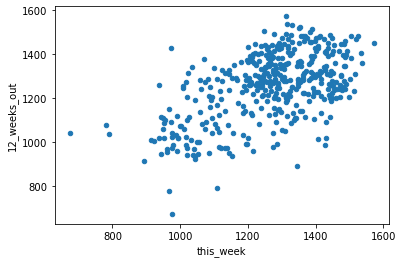

In [140]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.net_consumption.shift(-12)
weekly = weekly.rename(columns={'net_consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

Less correlation quarter-to-quarter, but still some

,consumption,wind,solar,wind_and_solar,month,year,this_week,half_a_year_later
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,1069.184000,1254.896857
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,1381.300143,1279.510571
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,1486.730286,1260.945286
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,1490.031143,1261.179714
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,1514.176857,1263.756571
...,...,...,...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,4.571429,2014.0,1131.674143,NaN
2014-05-11,1372.166000,204.100143,124.597143,328.697286,5.000000,2014.0,1043.468714,NaN
2014-05-18,1372.636143,117.518286,131.462000,248.980286,5.000000,2014.0,1123.655857,NaN


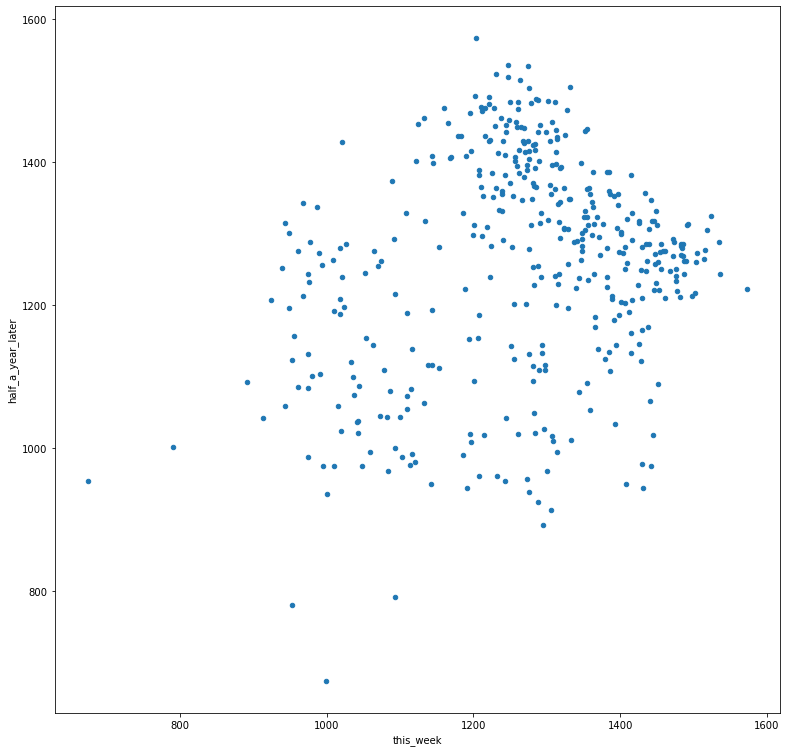

In [141]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.net_consumption.shift(-26)
weekly = weekly.rename(columns={'net_consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

Very little correlation after 6 months

## Autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

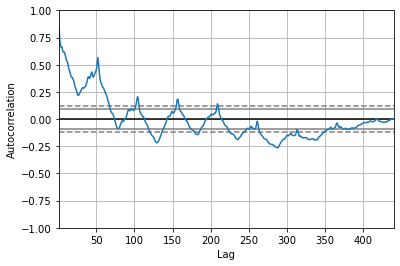

In [143]:
pd.plotting.autocorrelation_plot(train.net_consumption.resample('W').mean())

* Confidence in correlation drops off quickly
* Peaks occur every 50 weeks (100 weeks for a full cycle)
* Cycles seem less defined after 300 week lag
* Correlation changes from positive to negative as lag increases

## Seasonal decomposition 

In [144]:
y = train.net_consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,1069.184000,NaN,-44.230620,NaN
2006-01-08,1381.300143,NaN,-133.108814,NaN
2006-01-15,1486.730286,NaN,-16.872242,NaN
2006-01-22,1490.031143,NaN,102.117932,NaN
2006-01-29,1514.176857,NaN,117.331528,NaN


<AxesSubplot:xlabel='date'>

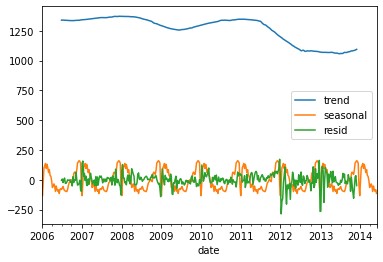

In [145]:
decomposition.iloc[:, 1:].plot()

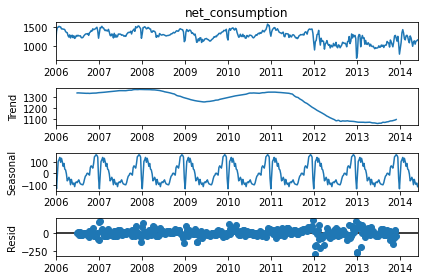

In [146]:
result.plot()
None

* Seasonality looks the same over all the years, but the trend has a large decrease starting at mid 2011.
* Wider range in residuals starting at 2012

## Categories over time

In [147]:
# create a categorical feature
train['generation_bin'] = pd.qcut(train.net_consumption, 4, labels=['high_alt_generation', 'avg_alt_generation',\
                                                              'below_avg_alt_generation', 'mostly_conventional_generation'])
train.groupby('generation_bin').mean()

,consumption,wind,solar,wind_and_solar,month,year,net_consumption
generation_bin,,,,,,,
high_alt_generation,1133.308492,113.259997,56.317688,157.227086,6.340287,2011.112125,976.081405
avg_alt_generation,1273.176546,59.949841,28.865704,66.982425,6.535854,2010.099087,1206.194121
below_avg_alt_generation,1374.808233,37.386584,4.399814,12.996653,6.441982,2008.936115,1361.811580
mostly_conventional_generation,1505.157417,45.665778,1.750138,5.773508,6.092568,2008.710561,1499.383909


Text(0, 0.5, '% of days in the month')

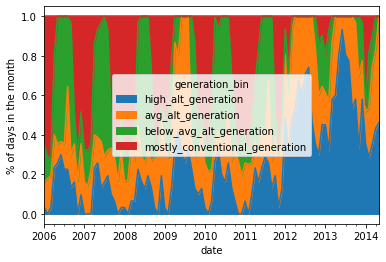

In [148]:
(train.groupby('generation_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

* Large increase in high_alt_generation and avg_alt_generation days starting in 2012

<AxesSubplot:xlabel='date,generation_bin'>

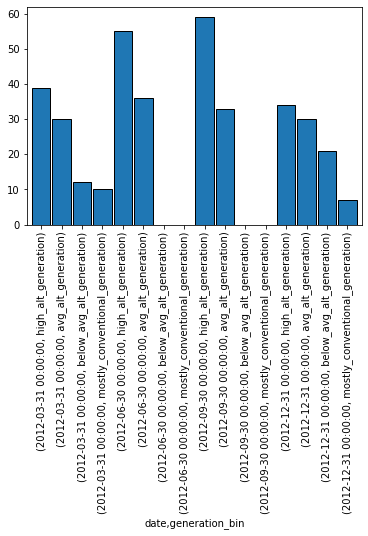

In [158]:
train['2012'].groupby('generation_bin').resample('Q').size().unstack(0).plot.bar(stacked=True, width=.9, ec='black')

## strftime

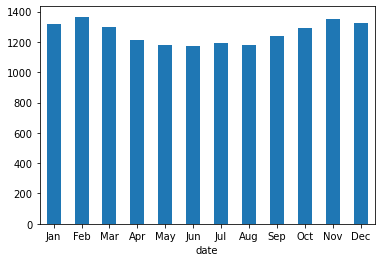

In [159]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

## Matpolitlib dates

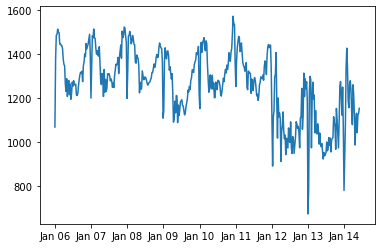

In [160]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))